<a href="https://colab.research.google.com/github/dooooing/2023-ESAA-/blob/main/0602_%EC%A0%9C%EC%B6%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch6_1~3pg_377~395.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**파이썬 머신러닝 완벽가이드** ch6.1-3) pg.377~395

# Chap 06. 차원 축소

## 01. 차원 축소(Dimension Reduction) 개요

---

대표적인 차원 축소 알고리즘: PCA, LDA, SVD, NMF

**차원 축소**: 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것

- 차원이 증가할수록 -> 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 됨.

- 수백 개 이상의 피처로 구성된 데이터 세트의 경우 -> 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어짐.

- 피처가 많을 경우 -> 개별 피처 간에 상관관계가 높을 가능성이 큼.

- 선형 회귀와 같은 선형 모델에서 입력 변수 간의 상관관계가 높을 경우 -> 다중 공선성 문제 -> 예측 성능이 저하됨.

=> 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 -> 더 직관적으로 데이터 해석, 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있음.

---

차원 축소- 피처 선택(feature selection)/피처 추출(feature extraction)

- **피처 선택(feature selection)**: 특성 선택(특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택). 

- **피처 추출(feature extraction)**: 특성 추출(기존 피처를 저차원의 중요 피처로 압축해서 추출). 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 됨. 기존피처를 단순 압축이 아닌, 피처를 **함축적으로** 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출.   
    ex) 내신 성적, 모의고사 성적, 수능 성적 -> 학업 성취도  
    (함축적인 특성 추출: 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor) 추출)  

=> 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출!

---
**차원 축소 알고리즘**

- 차원 축소 알고리즘=> 매우 많은 픽셀로 이뤄진 이미지 데이터 -> 잠재된 특성을 피처로 도출 -> 함축적 형태의 이미지 변환, 압축 수행

- 변환된 이미지=> 적은 차원 -> 분류 수행 시 과적합(Overfitting) 영향력이 작아져 -> 원본 데이터로 예측하는 것보다 예측 성능을 더 끌어 올릴 수 있음.

- 텍스트 문서의 숨겨진 의미 추출=> 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic) 의미/토픽(Topic)을 잠재 요소로 간주하고 이를 찾아냄. => SVD, NMF: 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘

---


## 02. PCA(Principal Component Analysis)

**PCA 개요**

PCA: 여러 변수 간에 존재하는 **상관관계**를 이용해 이를 대표하는 **주성분(Principal Component)을 추출해 차원을 축소**하는 기법

- PCA로 차원 축소 -> 기존 데이터의 정보 유실 최소화!!!

- 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원 축소 => PCA의 주성분  
    (분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)
  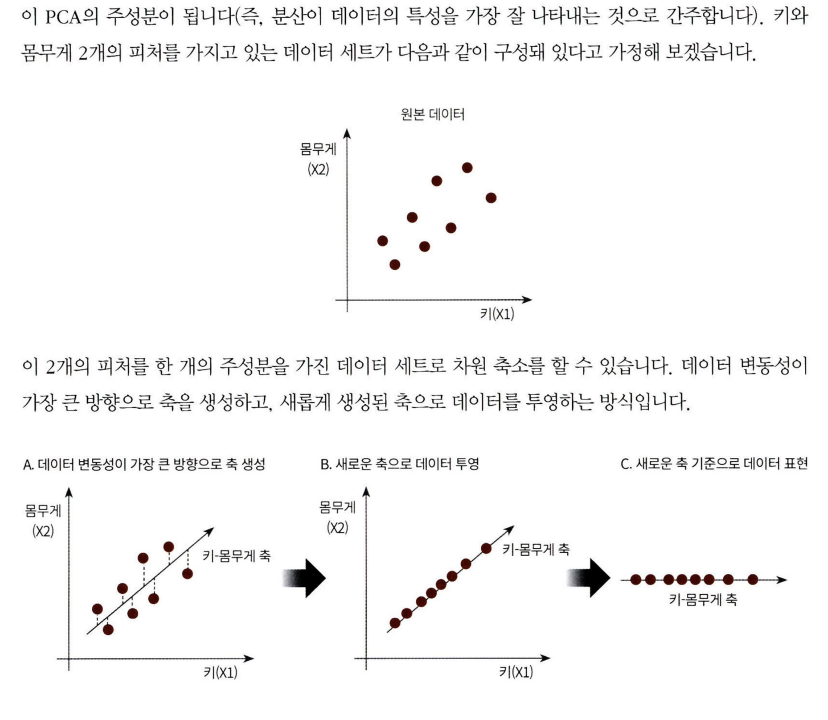

  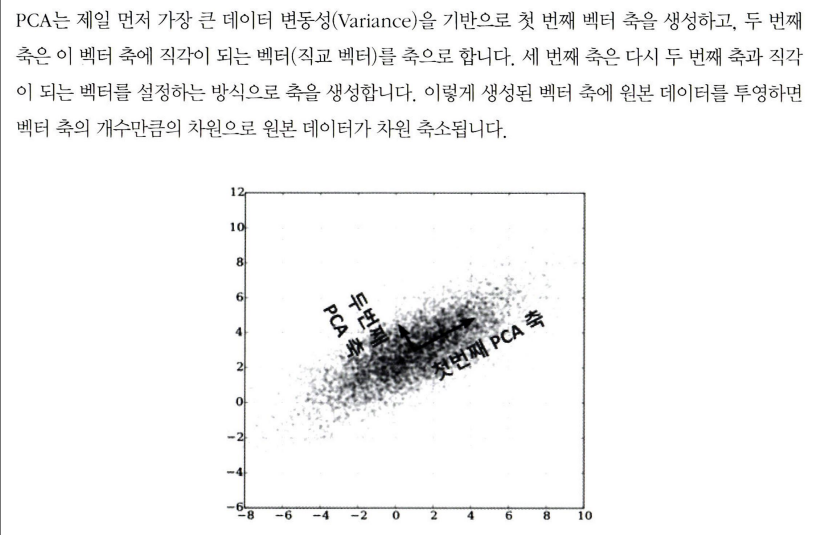



PCA(주성분 분석) => 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법





---

(1) PCA를 선형대수 관점에서 해석해보면

입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유 벡터에 입력 데이터를 선형 변환하는 것이다.

- 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다.

- 고유값은 바로 이 고유 벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.

<고유 벡터>

- 고유벡터는 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터를 지칭한다.

- 고유벡터는 여러개가 존재하며, 정방 행렬은 최대 그 차원의 수만큼 고유벡터를 가질 수 있다.

<공분산 행렬>

- 정방행렬이며 대칭행렬이다.

- 공분산행렬은 개별 분산 값을 대각 원소로 하는 대칭행렬이다. 이 대칭행렬은 항상 고유벡터를 직교행렬로, 고유값을 정방 행렬로 대각화할 수 있다.

- 입력 데이터의 공분산 행렬을 C라고 하면, 공분산 행렬의 특성으로 아래와 같이 분해할 수 있다. P는 nxn의 직교행렬이며, 기호는 nxn의 정방행렬이다.

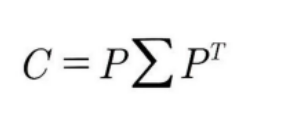

=> 입력데이터의 공분산행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유 벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA이다.

(2) PCA 단계

1. 입력 데이터 세트의 공분산 행렬을 생성한다.

2. 공분산 행렬의 고유벡터와 고유값을 계산한다.

3. 고유값이가장 큰 순으로 K(PCA 변환 차수만큼)개 만큼 고유벡터를 추출한다.

4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

---


- 붗꽃(iris) 데이터 세트의 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris=load_iris()

# 넘파이 데이터 세트를 판다스 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data,columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화  
    - 두 개의 속성인 sepal length, sepal width를 X축, Y축으로 해 품종 데이터 분포를 나타냄.

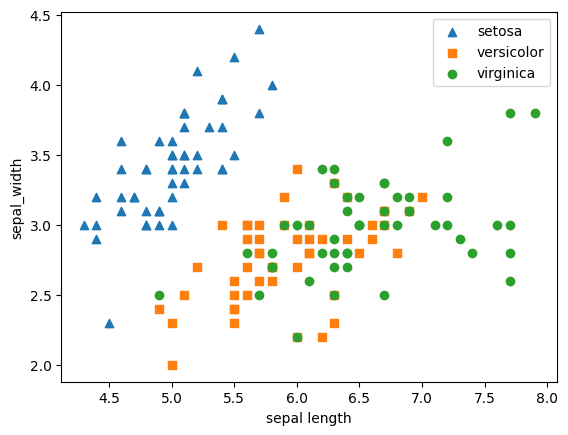

In [ ]:
# setosa는 세모, versicolor은 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
  y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal_width')
plt.show()
     

=> 결과

Setosa 품종: sepal width > 3.0, sepal length <= 6.0인 곳에 일정하게 분포돼 있다.

Versicolor, Virginica 품종: sepal width, sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다.

---



- PCA로 4개 속성을 2개로 압축한 뒤 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화
    - 먼저, 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링해해야 함. (PCA는 여러 속성 값을 연산해야 하므로 속성의 스케일에 영향을 받음 -> 여러 속성을 PCA로 압축하기 전에 각 속성값을 **동일한 스케일로 변환**하는 것이 필요)
    - 사이킷런의 StandardScaler 이용 -> 평균이 0, 분산이 1인 표준 정규 분포로 변환


In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler을 통해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])
 

- PCA 클래스의 생성 파라미터 n_components: PCA로 변환할 차원의 수

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


- DataFrame으로 변환한 뒤 데이터값 확인

In [ ]:
pca_columns = ['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target'] = iris.target

irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


- 2차원상에서 시각화해서 분포 확인
    - pca_component_1: X축, pca_component_2: Y축

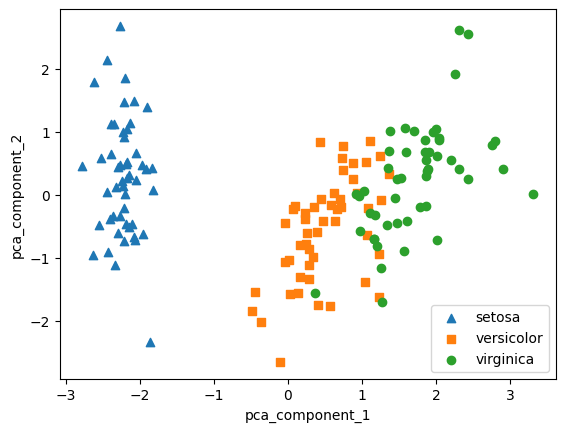

In [ ]:
# setosa는 세모 versicolor는 네모 virginica는 동그라미로 표시
markers = ['^','s','o']

# pca_component_1을 x축, pc_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
  x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
  y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

=> 결과

PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분 가능

Versicolor, Virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분됨.

=> pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문!



- PCA Component별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보자
    - explained_variance_ratio_: PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율 제공

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


=> 결과

첫 번째 PCA 변환 요소인 pca_component_1: 전체 변동성의 약 72.9% 차지

두 번째 PCA 변환 요소인 pca_component_2: 전체 변동성의 약 22.8% 차지

---


- 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류 적용 후 결과 비교
     - Estimator: RadomForestClassifier 이용
     - cross_val_score()로 3개의 교차 검증 세트로 정확도 결과 비교

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:',np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [ ]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:',np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


=> 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없다.

  - 4개의속성 -> 2개의 변환 속성으로 감소 => 예측 성능의 정확도 10% 하락
  - 속성 개수가 50% 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

  ---

  

- 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤,예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

# header로 의미 없는 첫 행 제거, iloc으로 기존 id 제거
df = pd.read_excel('/content/drive/MyDrive/23-1 ESAA YB/data/credit_card.xls', header = 1, sheet_name='Data').iloc[0:, 1:]

print(df.shape)
df.head(3)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


=> 신용카드 데이터 세트

- default payment next month: Target 값. 다음달 연체 여부. '연체'=1/'정상납부'=0

- 칼럼명 변환, target 속성 별도 저장

In [ ]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

23개의 속성 데이터 세트- 각 속성끼리 상관도가 매우 높다

- corr()이용해 각 속성 간 상관도 구한 뒤, Seaborn의 heatmap으로 시각화

<Axes: >

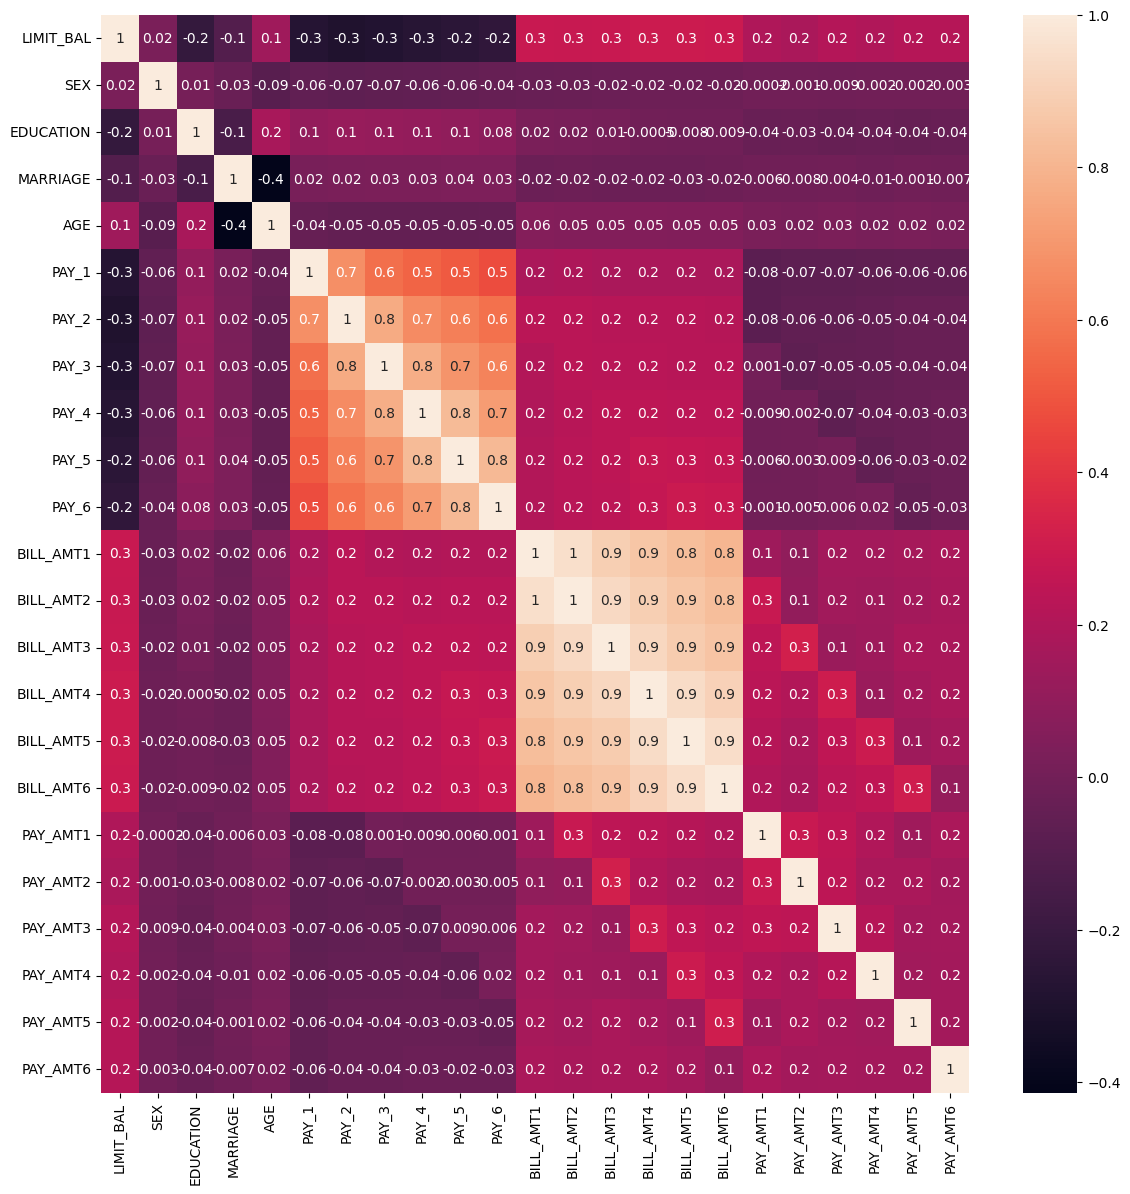

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

=> 결과

BILL_ATM1 ~ BILL_ATM6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높음.

이보다는 낮지만 PAY_1 ~ PAY_6 속성 역시 상관도가 높음.

=> 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다.

- 6개의 속성(BILL_ATM1 ~ BILL_ATM6) -> 2개의 컴포넌트로 PCA 변환 -> 개별 컴포넌트의 변동성 알아보기(explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1~BILL_AMT6까지의 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체를 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


=> 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며, 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다.


---



- 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교
    - 원본 데이터 세트에 랜덤 포레스트 이용 -> 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 개별 Fold세트 별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트 별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


=> 3개의 교차 검증 세트에서 평균 예측 정확도: 약 81.70%

- 6개의 컴포넌트로 PCA 변환한 데이터 세트에 대해 동일하게 분류 예측 적용


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA변환을 수행하고 cross_val_score()로 분류 예측 수행
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도:',scores_pca)
print('PCA 변환 데이터 세트 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도: [0.79   0.7983 0.8017]
PCA 변환 데이터 세트 평균 정확도:0.7967


=> 전체 23개 속성의 약 1/4 수준인 6개의 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2% 정도의 예측 성능 저하만 발생

  (미비한 성능 저하로 보기 힘들긴 하지만, 전체 속성의 1/4 정도만으로 이 정도 수치의 예측 성능을 유지할 수 있다는 것은 PCA의 뛰어난 압축 능력을 잘 보여주는 것)


---




PCA
- 차원 축소를 통해 데이터를 쉽게 인지하는 데 활용
- 컴퓨터 비전(Computer Vision) 분야에서 더 활발하게 적용됨  
    ex) 얼굴 인식- Eigen-face라고 불리는 PCA 변환으로 원본 얼굴 이미지를 변환해 사용)




---






## 03. LDA(Linear Discriminant Analysis)


---

**LDA 개요**

LDA: 선형 판별 분석법. PCA와 매우 유사
- 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법. (PCA와 유사점)
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다. (PCA와 차이점)


=> 특정 공간상에서 클래스 분리를 최대화하는 축을 찾기 위해 클래스 간 분산(between-class scatter)과 클래스 내부 분산(within-class scatter)의 비율을 최대화하는 방식으로 차원 축소

  (클래스 간 분산은 최대한 크게/클래스 내부의 분산은 최대한 작게 가져가는 방식)

- 좋은 클래스 분리를 위해 클래스 간 분산이 크고, 클래스 내부 분산이 작은 것을 표현한 그림


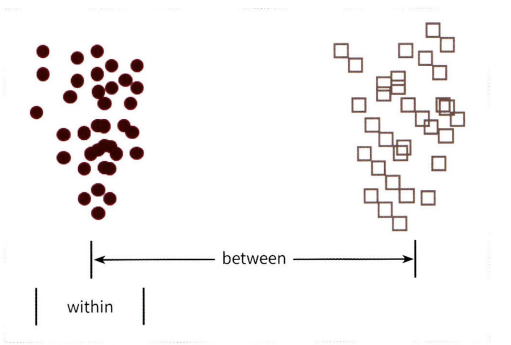


=> 일반적으로 LDA를 구하는 스텝은 PCA와 유사하나, 가장 큰 차이점은 공분산 행렬이 아닌, **클래스 간 분산과 클래스 내부 분산 행렬을 생성한 뒤, 이 행렬에 기반해 고유벡터를 구하고 입력 데이터를 투영한다는 점**.


<LDA를 구하는 단계>

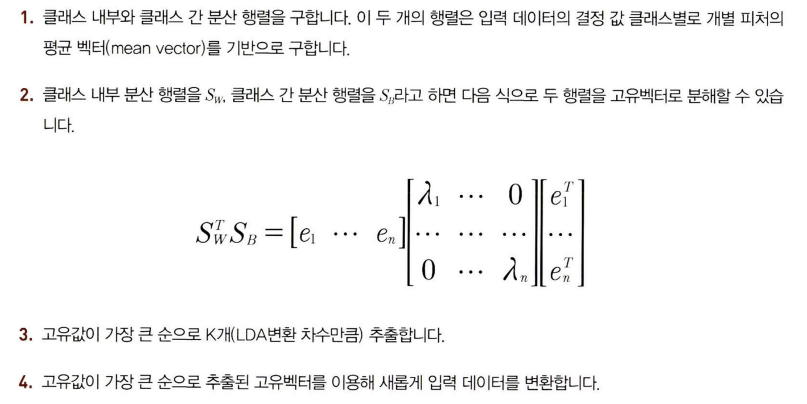

- 붓꽃 데이터 세트에 LDA 적용하기
    - 붓꽃 데이터 세트를 사이킷런의 LDA 이용해 변환 -> 그 결과를 품종별로 시각화
    - 표준 정규 분포로 스케일링

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

=> 2개의 컴포넌트로 붓꽃 데이터 LDA 변환

   - LDA에서 한 가지 유의해야 할 점(PCA와 차이점): LDA는 실제로는 PCA와 다르게 비지도학습이 아닌 **지도학습**  
    => 클래스의 결정값이 변환 시에 필요  
    (다음 LDA 객체의 fit() 메서드를 호출할 때 결정값이 입력됐음에 유의)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


- LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

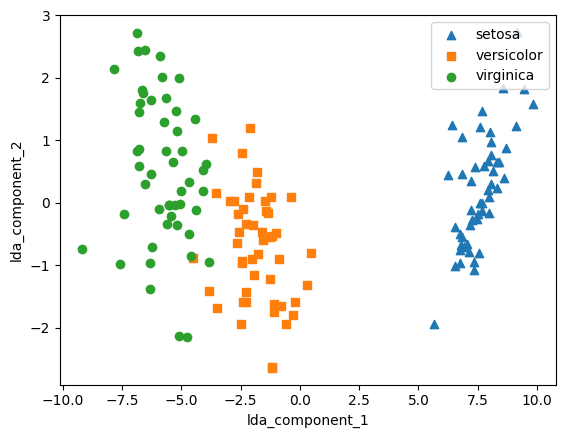

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모,versicolor은 네모, virginica는 동그라미
markers = ['^','s','o']

# setosa의 target값은 0, versicolor은 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
  x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
  y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
  plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()